In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\sujit\Downloads\spam.csv", encoding_errors='ignore')

In [3]:
import nltk
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sujit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


df

In [4]:
df.shape

(5572, 5)

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1733,spam,"Hi, this is Mandy Sullivan calling from HOTMIX...",NaN,NaN,NaN
1113,ham,"No I'm good for the movie, is it ok if I leave...",NaN,NaN,NaN
3998,ham,K...k...when will you give treat?,NaN,NaN,NaN
422,ham,Siva is in hostel aha:-.,NaN,NaN,NaN
3383,spam,FREE MSG:We billed your mobile number by mista...,NaN,NaN,NaN


In [6]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [9]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
df.isnull().sum()

target    0
text      0
dtype: int64

##1.data cleaning

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [12]:
df["target"]=encoder.fit_transform(df["target"])

In [13]:
df.sample(5)

,target,text
1813,0,Yes we are chatting too.
1181,0,You flippin your shit yet?
1607,0,Jus telling u dat i'll b leaving 4 shanghai on...
218,0,I have to take exam with march 3
5226,0,Prabha..i'm soryda..realy..frm heart i'm sory


In [14]:
df.duplicated().sum()

404

In [15]:
df=df.drop_duplicates(keep="first")

In [16]:
df.shape

(5168, 2)

In [17]:
df.duplicated().sum()

0

#

#eda

In [18]:
df["target"].value_counts()

target
0    4516
1     652
Name: count, dtype: int64

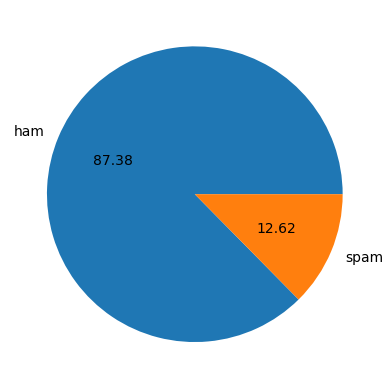

In [19]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [20]:
import nltk

In [21]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sujit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df["num_charecters"]=df["text"].apply(len)

C:\Users\sujit\AppData\Local\Temp\ipykernel_11696\3236432809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_charecters"]=df["text"].apply(len)


In [24]:
df.head()

,target,text,num_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df["nums_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\sujit\AppData\Local\Temp\ipykernel_11696\3517521997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nums_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))


In [26]:
df.head()

,target,text,num_charecters,nums_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df["nums_sentences"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\sujit\AppData\Local\Temp\ipykernel_11696\1759378930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nums_sentences"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))


In [28]:
df[["num_charecters","nums_words","nums_sentences"]].describe()

,num_charecters,nums_words,nums_sentences
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.441176,1.966331
std,58.104099,13.327587,1.449367
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df["target"]==0][["num_charecters","nums_words","nums_sentences"]].describe()

,num_charecters,nums_words,nums_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.344110,17.108946,1.819973
std,56.328803,13.494730,1.383228
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df[df["target"]==1][["num_charecters","nums_words","nums_sentences"]].describe()

,num_charecters,nums_words,nums_sentences
count,652.000000,652.000000,652.000000
mean,137.047546,27.668712,2.980061
std,29.937352,7.015283,1.491780
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,9.000000


<Axes: xlabel='num_charecters', ylabel='Count'>

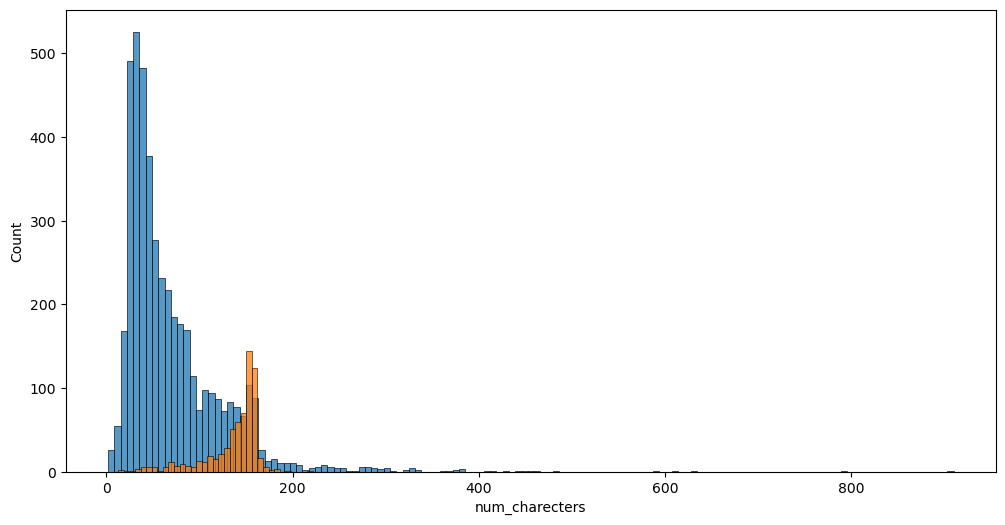

In [31]:
plt.figure(figsize=(12,6))
import seaborn as sns
sns.histplot(df[df["target"]==0]["num_charecters"])
sns.histplot(df[df["target"]==1]["num_charecters"])

<Axes: xlabel='nums_words', ylabel='Count'>

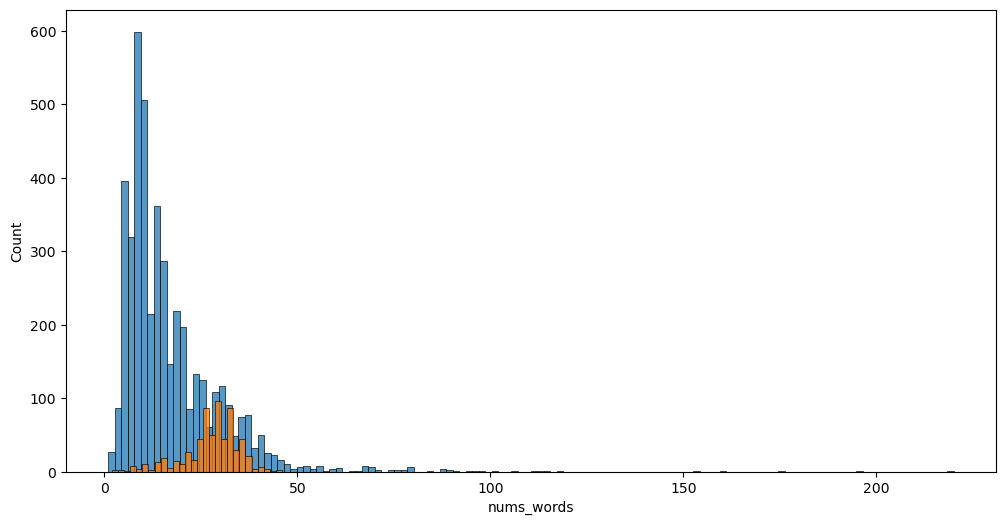

In [32]:
plt.figure(figsize=(12,6))
import seaborn as sns
sns.histplot(df[df["target"]==0]["nums_words"])
sns.histplot(df[df["target"]==1]["nums_words"])

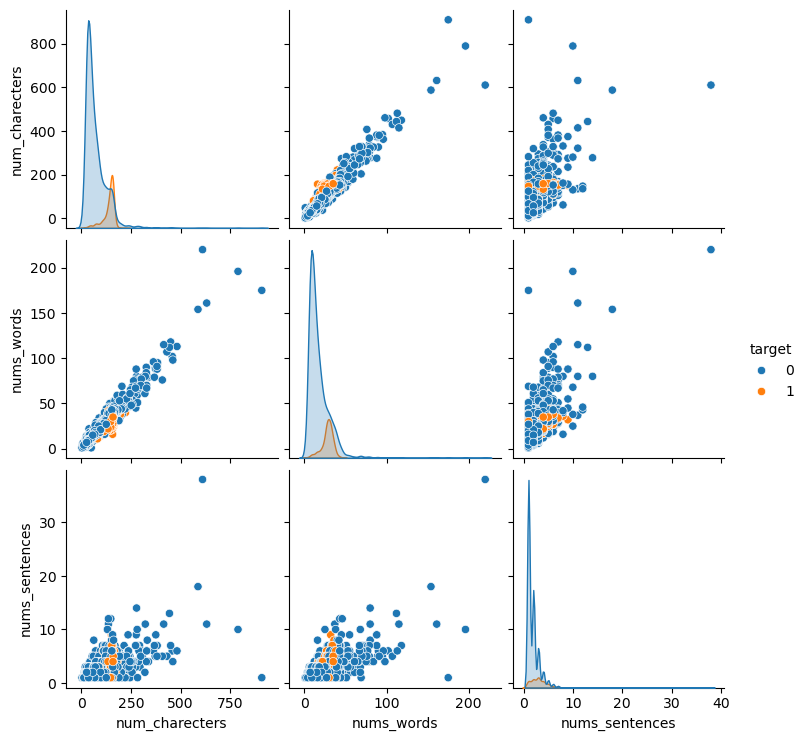

In [33]:
sns.pairplot(df,hue="target")

In [ ]:
#data preprocessing
# .lower case
# .tokenizer
# .romoving special charector
# .removing stop words and puncuation
# .streaming

In [38]:
# def transform_text(text):
#     text=text.lower()
#     text=nltk.word_tokenize(text)
#     y=[]
#     for i in text:
#         if i.isalnum():
#             y.append(i)
#     text=y[:]
#     y.clear()
#     for i in text:
#         if i not in stopwords.words("english") and i not in string.punctuation:
#             y.append(i)

#     text=y[:]
#     y.clear()
#     for i in text:
#         y.append(ps.stem(i))
#     return " ".join(y)



def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [40]:
transform_text("i wanting to dancing for lon hour upto thousand dancing hour")

'want danc lon hour upto thousand danc hour'

In [34]:
from nltk.corpus import stopwords
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [35]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [43]:
df["transformed_text"]=df["text"].apply(transform_text)

C:\Users\sujit\AppData\Local\Temp\ipykernel_11696\958737439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"]=df["text"].apply(transform_text)


In [44]:
df.head()

,target,text,num_charecters,nums_words,nums_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud
wc=WordCloud()

In [46]:
spam_wc=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

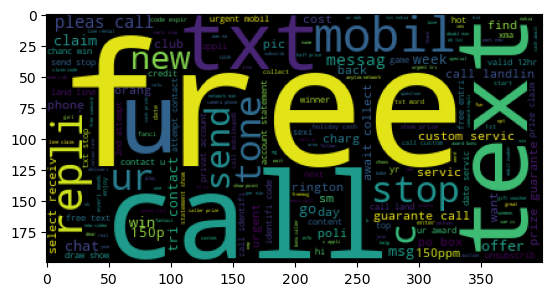

In [47]:
plt.imshow(spam_wc)

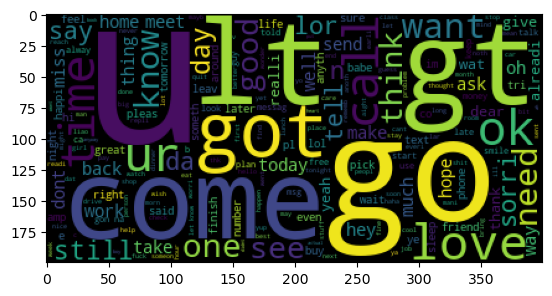

In [48]:
ham_wc=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))
plt.imshow(ham_wc)

In [57]:
spam_corpus=[]
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [58]:
print(spam_corpus)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', '900', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', '

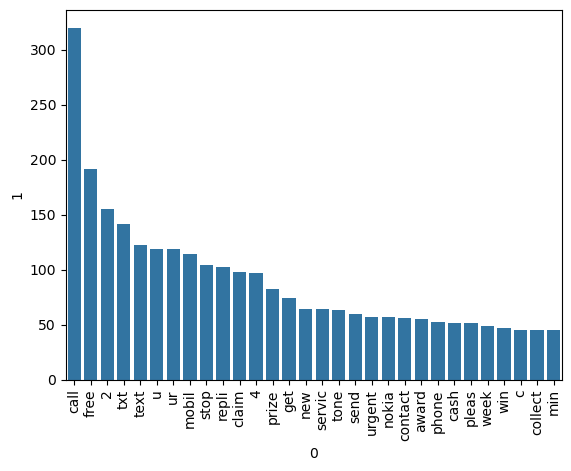

In [65]:
from collections import Counter
sns.barplot(
    x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
    y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
)
plt.xticks(rotation="vertical")
plt.show()

In [66]:
ham_corpus=[]
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

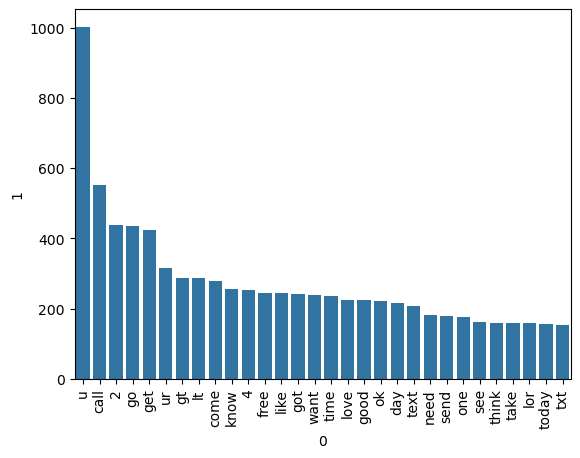

In [67]:
from collections import Counter
sns.barplot(
    x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
    y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
)
plt.xticks(rotation="vertical")
plt.show()

#####model building#######

In [153]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [154]:
X=tfidf.fit_transform(df["transformed_text"]).toarray()

In [155]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [156]:
X.shape

(5168, 3000)

In [157]:
y=df["target"].values

In [158]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [161]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [162]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [163]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8752417794970987
[[791 102]
 [ 27 114]]
0.5277777777777778


In [165]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893   0]
 [ 31 110]]
1.0


In [166]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9796905222437138
[[892   1]
 [ 20 121]]
0.9918032786885246


In [167]:
#tfidf ,mnb

In [168]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))

In [173]:
sample=["Congratulations! You have won a free iPhone. Click to claim your prize now.",
    "You have been selected for a $1000 gift card. Reply YES to claim.",
    "Win cash instantly! Text WIN to 12345 now.",
    "Urgent! Your account has been suspended. Verify immediately at [link].",
    "Get cheap loans at low interest rates. Apply now!",
    "You won a lottery! Send your bank details to claim.",
    "Exclusive offer! Buy one get one free today only.",
    "You have a pending prize. Click here to collect.",
    "Free entry in 2 crore contest! Reply with YES.",
    "Limited time offer! Get your free subscription now.",

    # Ham (non-spam) messages
    "Hey, are we still meeting for lunch today?",
    "Don't forget to submit your assignment by tomorrow.",
    "Can you call me when you get a chance?",
    "Happy birthday! Hope you have a wonderful day.",
    "Let's go for a movie this weekend. Are you free?",
    "Did you finish your homework?",
    "I am on my way, will reach in 10 minutes.",
    "Are you attending the meeting later?",
    "Please bring the documents with you.",
    "Let's have dinner together tonight.","hi i saw your presentation do you want to meet me"]
X_sample =tfidf.transform(sample)
print(mnb.predict(X_sample))

[1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
